In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called predict_message that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the SMS Spam Collection dataset. The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.

In [1]:
# import libraries
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

#print(tf.__version__)

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [10]:
# write data from tsv to pandas dataframes
train = pd.read_csv(train_file_path, sep = "\t", names = ["h/s","text"])
test = pd.read_csv(test_file_path, sep = "\t", names = ["h/s","text"])

In [11]:
# look and explore data
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   h/s     4179 non-null   object
 1   text    4179 non-null   object
dtypes: object(2)
memory usage: 65.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   h/s     1392 non-null   object
 1   text    1392 non-null   object
dtypes: object(2)
memory usage: 21.9+ KB


In [12]:
train.head(10)

,h/s,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
5,ham,in xam hall boy asked girl tell me the startin...
6,ham,genius what's up. how your brother. pls send h...
7,ham,they finally came to fix the ceiling.
8,spam,urgent! call 09066350750 from your landline. y...
9,ham,now that you have started dont stop. just pray...


In [13]:
train["len"] = train["text"].apply(len)
test["len"] = test["text"].apply(len)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


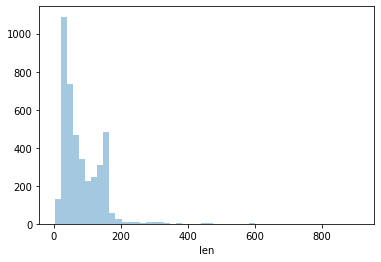

In [14]:
sns.distplot(train['len'], kde=False)

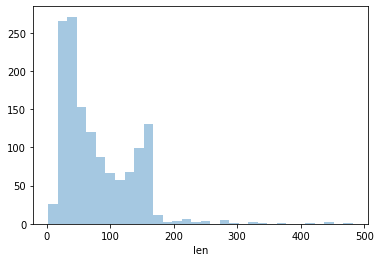

In [15]:
sns.distplot(test['len'], kde=False)

In [9]:
print(train["len"].median(),
      train["len"].mean())

62.0 80.47379755922469


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Num of h/s')

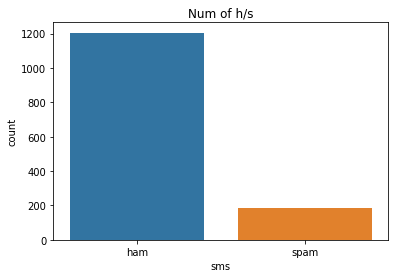

In [16]:
sns.countplot(test['h/s'])
plt.xlabel("sms")
plt.title("Num of h/s")

In [17]:
# make labels
test_data, train_data = test["text"], train["text"]
lab_enc = LabelEncoder()
test_labels = lab_enc.fit_transform(test["h/s"]).reshape(-1,1) 
train_labels = lab_enc.fit_transform(train["h/s"]).reshape(-1,1)
# 0 - ham, 1 - spam

In [18]:
train_data

0       ahhhh...just woken up!had a bad dream about u ...
1                                you can never do nothing
2       now u sound like manky scouse boy steve,like! ...
3       mum say we wan to go then go... then she can s...
4       never y lei... i v lazy... got wat? dat day ü ...
                              ...                        
4174    just woke up. yeesh its late. but i didn't fal...
4175    what do u reckon as need 2 arrange transport i...
4176    free entry into our £250 weekly competition ju...
4177    -pls stop bootydelious (32/f) is inviting you ...
4178    tell my  bad character which u dnt lik in me. ...
Name: text, Length: 4179, dtype: object

In [19]:
VOCAB_SIZE = 3000
MAXLEN = 200

# creat token.
# make tokens for most popular words (count tokens VOCAB_SIZE-1)
tok = Tokenizer(num_words=VOCAB_SIZE)

# updating tokens dictionary on base of texts list
tok.fit_on_texts(train_data)

# converting each text in texts to a sequence of integers.
train_data = tok.texts_to_sequences(train_data)
test_data = tok.texts_to_sequences(test_data)

In [20]:

# if the sms is greater than MAXLEN words then trim off the extra words
# if the sms is less than MAXLEN words add the necessary amount of 0's 
# to make it equal to MAXLEN.
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

In [21]:
train_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [22]:
# creating a model
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(VOCAB_SIZE, 64),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          192000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 225,089
Trainable params: 225,089
Non-trainable params: 0
_________________________________________________________________


In [24]:
#compile the model
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])

In [25]:
# teach the model
history = model.fit(train_data, train_labels, batch_size=64, epochs=7, validation_split=0.2)

Epoch 1/7
53/53 [==============================] - 12s 171ms/step - loss: 0.2642 - acc: 0.9064 - val_loss: 0.1104 - val_acc: 0.9856
Epoch 2/7
53/53 [==============================] - 8s 159ms/step - loss: 0.0702 - acc: 0.9856 - val_loss: 0.0516 - val_acc: 0.9892
Epoch 3/7
53/53 [==============================] - 8s 160ms/step - loss: 0.0356 - acc: 0.9898 - val_loss: 0.0564 - val_acc: 0.9844
Epoch 4/7
53/53 [==============================] - 9s 162ms/step - loss: 0.0264 - acc: 0.9922 - val_loss: 0.0445 - val_acc: 0.9868
Epoch 5/7
53/53 [==============================] - 9s 171ms/step - loss: 0.0186 - acc: 0.9946 - val_loss: 0.0557 - val_acc: 0.9868
Epoch 6/7
53/53 [==============================] - 10s 180ms/step - loss: 0.0107 - acc: 0.9979 - val_loss: 0.0683 - val_acc: 0.9868
Epoch 7/7
53/53 [==============================] - 10s 181ms/step - loss: 0.0092 - acc: 0.9979 - val_loss: 0.0661 - val_acc: 0.9868


In [26]:
# check the model in test data
results = model.evaluate(test_data, test_labels)
print(f"Loss: {results[0]}, Acc: {results[1]}")

44/44 [==============================] - 1s 28ms/step - loss: 0.0637 - acc: 0.9828
Loss: 0.0636739507317543, Acc: 0.982758641242981


In [27]:
# try our model in some text
def predict_message(pred_text):
  """ 
     function to predict messages based on model
     (should return list containing prediction and label,
     ex. [0.008318834938108921, 'ham'])
  """
  tokens = tok.texts_to_sequences([pred_text])
  encode_text = sequence.pad_sequences(tokens, MAXLEN)
  pred = np.zeros((1,200))
  pred[0] = encode_text
  result = model.predict(pred) 
  f = lambda x: "spam" if round(x + 0.01) else "ham"
  prediction = [result[0][0], f(result[0][0])]
 
  return (prediction)

pred_text = "sale today! to stop texts call 98912460324"

prediction = predict_message(pred_text)
print(prediction)

[0.6977588, 'spam']


In [28]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
